In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

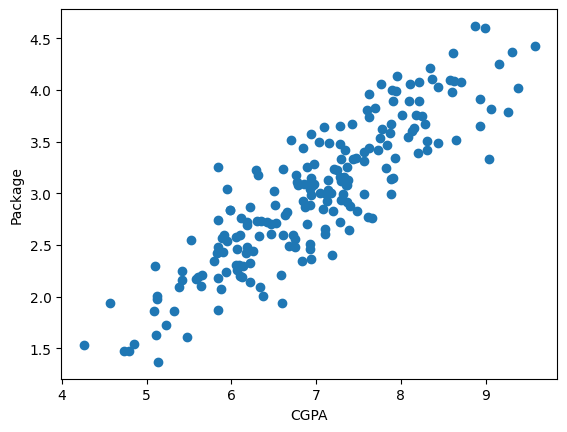

In [60]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [7]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Building a linear regression model from scratch

In [50]:
class linearReg:
    def _init_(self):
        self.m = None
        self.b = None
    
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_train.mean()) * (y_train[i]-y_train.mean())
            den += (X_train[i]-X_train.mean())**2
        self.m = num/den #Slope
        self.b = y_train.mean() - (self.m*X_train.mean())
        print("The value of slope is", self.m)
        print("The value of intercept is", self.b)
    
    def predict(self, X_test):
        return self.m*X_test + self.b

In [51]:
lr = linearReg()

In [52]:
lr.fit(X_train, y_train)

The value of slope is 0.5579519734250721
The value of intercept is -0.8961119222429152


In [53]:
lr.predict(X_test[0])

3.891116009744203

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
pred = lr.predict(X_test)

In [68]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [71]:
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Sqaured Error:",mean_squared_error(y_test,pred))
print("R2 Score:",r2_score(y_test, pred))

Mean Absolute Error: 0.2884710931878174
Mean Sqaured Error: 0.12129235313495523
R2 Score: 0.7807301475103842


In [74]:
r2 = r2_score(y_test, pred)
1- ((1-r2)*(40-1)/(40-1-1))

0.7749598882343417

### Linear Regression using Sklearn

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [44]:
model.fit(X_train.reshape(160,1),y_train)

LinearRegression()

In [45]:
model.coef_

array([0.55795197])

In [46]:
model.intercept_

-0.8961119222429144

In [55]:
model.predict(X_test[0].reshape(1,1))

array([3.89111601])

Text(0, 0.5, 'Package')

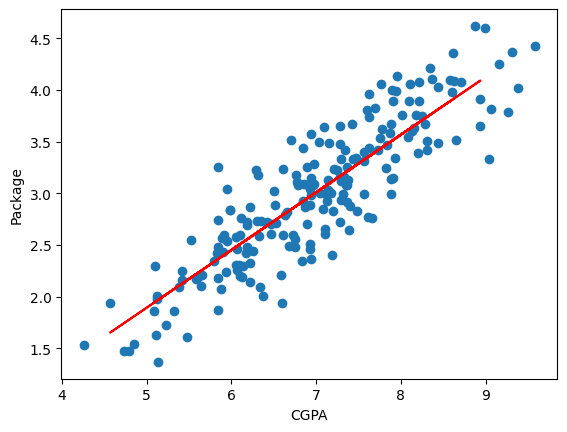

In [64]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test.reshape(-1,1), model.predict(X_test.reshape(-1,1)),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')